<a href="https://colab.research.google.com/github/FanesabhirawaningSulistyo/Machine_Learning_2024/blob/main/Jobsheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

===================================================================================

Nama  : Fanesabhirawaning Sulistyo

Kelas : TI-3C

Absen : 10

===================================================================================

#**Job Sheet 3: Regresi**

*   **Praktikum 1**


Langkah 2: Import Library

Import library NumPy dan Pandas yang digunakan untuk manipulasi data.

In [ ]:
# import package
import numpy as np
import pandas as pd

Langkah 3: Baca Data
Baca data dari file CSV dengan menggunakan Pandas.

In [ ]:
# baca data dari file CSV
data = pd.read_csv('dataset.csv')

Langkah 4: Pemahaman Terhadap Data

Menampilkan beberapa data awal, ukuran data, informasi data, dan deskripsi statistik data untuk memahami karakteristik data.

In [ ]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Langkah 5: Visualisasi Data

In [ ]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

Pairplot untuk menampilkan hubungan antara variabel bebas dan variabel target dalam bentuk scatter plot.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


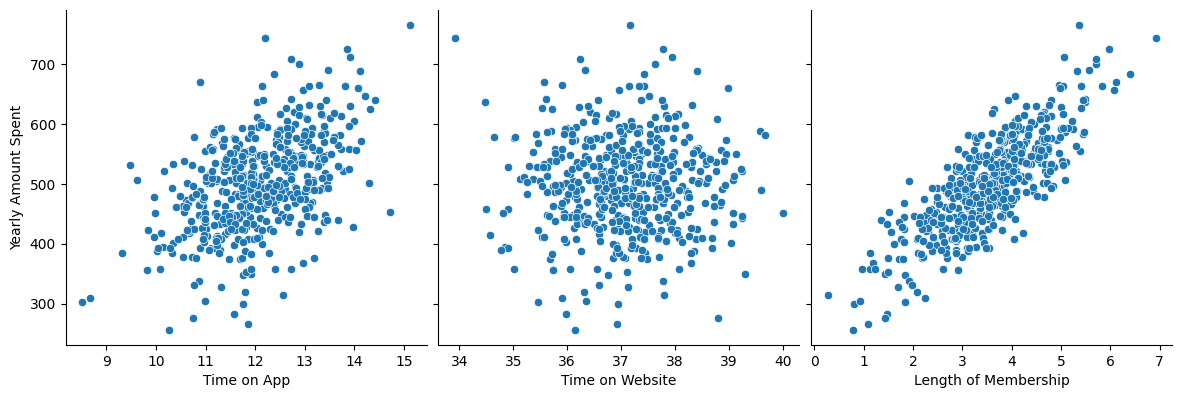

In [ ]:
# operasi visualisasi
sns.pairplot(data, x_vars=['Time on App', 'Time on Website','Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')

plt.show() # Menampilkan hasil plot ke layar.

#size=4: Mengatur ukuran plot menjadi 4 inch.

#aspect=1: Mengatur rasio aspek plot menjadi persegi.

#kind='scatter': Menentukan plot sebagai scatter plot.


**Kesimpulan:**

Scatter plot ini menunjukkan hubungan antara variabel Time on App, Time on Website, dan Length of Membership (sebagai sumbu X) dengan variabel Yearly Amount Spent (sebagai sumbu Y).
Tujuan dari plot ini adalah untuk melihat korelasi antara waktu yang dihabiskan di aplikasi/website atau lama keanggotaan dengan jumlah pengeluaran tahunan.
output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

**Heatmap** untuk menampilkan matriks korelasi antara variabel-variabel dalam dataset. Semakin tinggi nilainya, semakin tinggi korelasinya

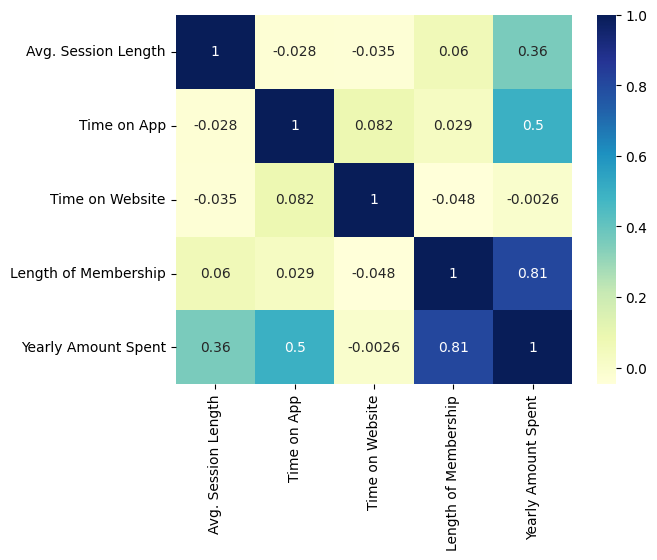

In [ ]:
# Memilih hanya kolom numerik dari dataset
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# data.select_dtypes(): memilih hanya kolom dengan tipe data numerik (float64 dan int64).

# Membuat heatmap korelasi berdasarkan kolom numerik

sns.heatmap(numerical_data.corr(), cmap="YlGnBu", annot=True)
# cmap="YlGnBu": Menentukan skema warna heatmap (kuning ke hijau ke biru).

plt.show()


**Kesimpulan**

Heatmap yang dihasilkan menampilkan hubungan korelasi antara kolom-kolom numerik dalam dataset. Warna pada heatmap bervariasi dari kuning (korelasi negatif) hingga biru (korelasi positif). Nilai korelasi ditampilkan di setiap sel untuk menunjukkan kekuatan dan arah hubungan antara variabel, dengan skala warna yang memudahkan interpretasi visual.


Dari bentuk visualisasi di atas terlihat bahwa Length of Membership memiliki korelasi yang paling kuat terhadap Yearly Amount Spent

Langkah 6: Regresi Linier

Pisahkan variabel bebas (X) dan variabel target (y).[teks link](https://)

In [ ]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

X.head()

,Length of Membership
0,4.082621
1,2.664034
2,4.104543
3,3.120179
4,4.446308


*   Membagi data menjadi data latih (70%) dan data uji (30%) menggunakan train_test_split.

*   Melakukan training model regresi linier menggunakan library StatsModels. Tambahkan konstanta (intercept) ke variabel bebas.

In [ ]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# train_size=0.7: 70% untuk pelatihan.
# test_size=0.3: 30% untuk pengujian.
# random_state=100: Menjaga konsistensi pengacakan data.

In [ ]:
# hasil training dtaset
X_train
y_train

,Yearly Amount Spent
153,657.019924
84,533.514935
310,479.614812
494,510.661792
126,516.831557
...,...
343,576.025244
359,561.874658
323,473.360496
280,511.979860


Dataset dipecah menjadi dua bagian, dengan 70% digunakan untuk melatih model dan 30% untuk menguji model, memastikan bahwa pengacakan data dilakukan secara konsisten.

In [ ]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params # Menampilkan parameter model, yaitu koefisien regresi dan intersep.


,0
const,265.248299
Length of Membership,66.301522


*   sm.add_constant(X_train): Menambahkan konstanta (intersep) ke data pelatihan agar model regresi linier bisa menghitung intercept.
*   sm.OLS(y_train, X_train_sm): Membangun model regresi linier menggunakan Ordinary Least Squares (OLS) dengan y_train sebagai variabel target dan X_train_sm sebagai fitur.
*  .fit(): Melatih model regresi linier berdasarkan data latih.

Kode ini melatih model regresi linier untuk memprediksi y_train berdasarkan X_train. Hasilnya adalah parameter model yang menunjukkan seberapa besar setiap fitur berkontribusi terhadap target.

In [ ]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.669
Model:                             OLS   Adj. R-squared:                  0.668
Method:                  Least Squares   F-statistic:                     702.9
Date:                 Wed, 11 Sep 2024   Prob (F-statistic):           1.59e-85
Time:                         02:12:52   Log-Likelihood:                -1841.3
No. Observations:                  350   AIC:                             3687.
Df Residuals:                      348   BIC:                             3694.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  265.2483      9.120     29.083      0.000     247.311     283.186
Length of Membership    66.3015      2.501     26.512      0.000      61.383      71.220
==============================================================================
Omnibus:                        1.643   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.440   Jarque-Bera (JB):                1.471
Skew:                          -0.013   Prob(JB):                        0.479
Kurtosis:                       2.683   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

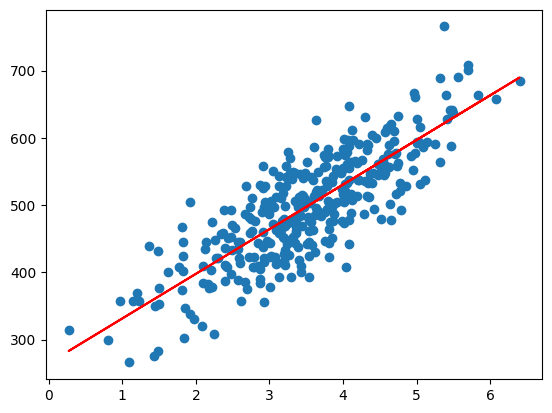

In [ ]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train) # Membuat scatter plot dari data pelatihan, menampilkan hubungan antara fitur X_train dan target y_train.
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show() # Menampilkan plot yang terdiri dari data scatter dan garis regresi.

*   plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r'): Menggambar garis regresi linier dengan menggunakan persamaan garis (intersep = 265.2483 dan koefisien = 66.3015), dengan garis berwarna merah ('r').

Visualisasi ini menunjukkan data pelatihan sebagai titik-titik scatter dan garis merah sebagai garis regresi linier yang dihasilkan dari model. Garis tersebut menggambarkan prediksi model terhadap data pelatihan.

Langkah 7: Analisis Residual

Melakukan prediksi nilai y dari data latih dan hitung residual (selisih antara nilai sebenarnya dan nilai prediksi).

In [ ]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)

Visualisasikan residual dalam bentuk histogram dan scatter plot untuk mengevaluasi distribusi dan pola error.

<ipython-input-29-a6ce713c550f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


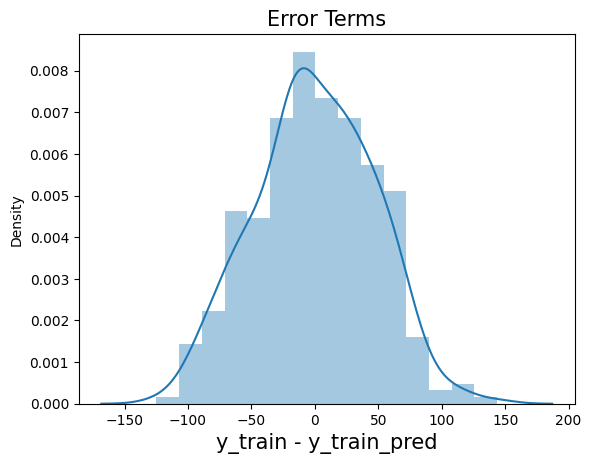

In [ ]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure() # Membuat figur baru untuk plot.
sns.distplot(res, bins = 15) # Membuat histogram residual res dengan 15 bins menggunakan Seaborn, serta overlay distribusi kernel density (sebaran data).
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15) # Memberikan judul dan label sumbu X pada plot untuk memperjelas konteks.
plt.show() # Menampilkan plot histogram.

Histogram ini digunakan untuk memvisualisasikan distribusi error terms (residual). Jika histogram menunjukkan pola yang mendekati distribusi normal (simetris dan berbentuk lonceng), maka residual dianggap berdistribusi normal, yang merupakan asumsi penting dalam regresi linier.

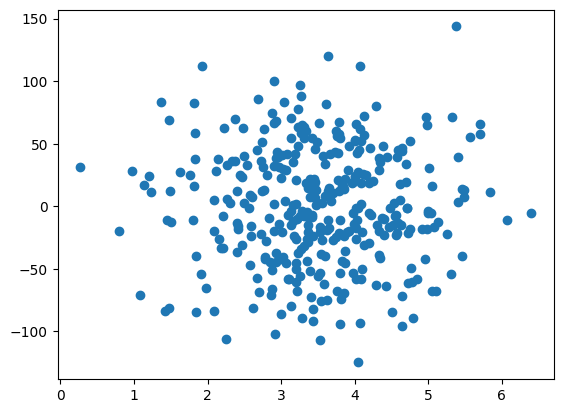

In [ ]:
plt.scatter(X_train,res)
plt.show()

Langkah 8: Prediksi pada Data Uji dan Evaluasi Model

Lakukan prediksi pada data uji.

In [ ]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()


,0
69,500.794385
29,579.688406
471,533.188991
344,446.066436
54,455.838449


*   sm.add_constant(X_test): Menambahkan konstanta (intersep) ke data uji X_test, agar sesuai dengan format data pelatihan yang digunakan model regresi.
*   lr.predict(X_test_sm): Menggunakan model regresi linier yang sudah dilatih (lr) untuk memprediksi nilai target y berdasarkan data uji X_test_sm (fitur uji yang telah diberi konstanta).
*   y_test_pred.head(): Menampilkan 5 nilai prediksi pertama dari hasil prediksi model terhadap data uji.


Kode ini memprediksi nilai target berdasarkan fitur data uji yang diberikan, lalu menampilkan 5 nilai prediksi teratas. Ini membantu mengevaluasi seberapa baik model dapat memprediksi data uji.

Hitung nilai R-squared untuk mengukur kinerja model pada data uji.

In [ ]:
# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r2_score(y_test, y_test_pred): Menghitung nilai R-squared, yang merupakan ukuran seberapa baik model regresi dapat menjelaskan variabilitas data uji y_test menggunakan prediksi y_test_pred.

r_squared # Menyimpan nilai R-squared yang dihitung.

0.611948913768747



*   r2_score(y_test, y_test_pred): Menghitung nilai R-squared, yang merupakan ukuran seberapa baik model regresi dapat menjelaskan variabilitas data uji y_test menggunakan prediksi y_test_pred.



Nilai R-squared (koefisien determinasi) mengukur seberapa baik model regresi menjelaskan variabilitas data target. Nilai mendekati 1 menunjukkan bahwa model menjelaskan sebagian besar variabilitas data, sedangkan nilai mendekati 0 menunjukkan bahwa model kurang baik dalam menjelaskan variabilitas data.





Perlu diperhatikan bahwa r^2 dari data training adalah 0.669 sedangkan dari data testing adalah 0,612. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

Langkah 9: Visualisasi Hasil

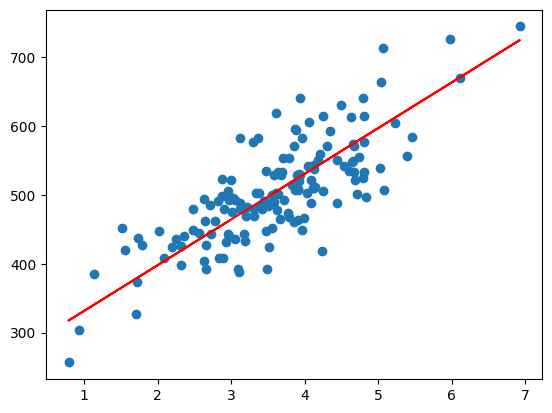

In [ ]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show() #Menampilkan plot

*   plt.scatter(X_test, y_test): Membuat scatter plot dari data uji, menampilkan hubungan antara fitur X_test dan nilai target aktual y_test.
*   plt.plot(X_test, y_test_pred, 'r'): Menggambar garis prediksi model (dari y_test_pred) di atas scatter plot dengan warna merah ('r'), menunjukkan hasil prediksi model terhadap data uji.


Visualisasi ini menunjukkan data uji sebagai titik-titik scatter dan hasil prediksi model sebagai garis merah. Garis ini menggambarkan bagaimana model memprediksi nilai target berdasarkan fitur data uji, memudahkan perbandingan antara nilai aktual dan prediksi model.

*   **Praktikum 2**

1. Mengimpor Library:

Lakukan import library yang diperlukan terlebih dahulu, termasuk NumPy, Matplotlib, dan pandas.

In [ ]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2. Mengimpor Dataset

Membaca dataset menggunakan pd.read_csv dan memilih fitur (variabel independen X) dan target (variabel dependen y).

In [ ]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja


*   dataset.iloc[:, 1:2].values: Mengambil kolom kedua dari dataset (menggunakan iloc) dan menyimpannya dalam X sebagai array NumPy. Ini berisi fitur yang akan digunakan untuk model.
*  dataset.iloc[:, 2].values: Mengambil kolom ketiga dari dataset (menggunakan iloc) dan menyimpannya dalam y sebagai array NumPy. Ini berisi target yang akan diprediksi.

3. Feature Scaling

Menggunakan StandardScaler untuk melakukan penskalaan fitur X dan target y. Ini diperlukan karena SVM sangat sensitif terhadap skala data.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

*   StandardScaler(): Membuat objek StandardScaler untuk melakukan standardisasi data.
*   sc_X.fit_transform(X.reshape(-1, 1)): Menstandardisasi fitur X dengan cara meratakan bentuknya ke dua dimensi dan mengubah skala menjadi distribusi dengan rata-rata 0 dan deviasi standar 1.
*   sc_y.fit_transform(y.reshape(-1, 1)): Menstandardisasi target y dengan cara meratakan bentuknya ke dua dimensi dan mengubah skala menjadi distribusi dengan rata-rata 0 dan deviasi standar 1.


Standardisasi ini mengubah fitur dan target ke skala yang sama, yaitu dengan rata-rata 0 dan deviasi standar 1, yang penting untuk banyak algoritma pembelajaran mesin agar model berfungsi dengan baik.

4. Fitting SVR ke Dataset

Pembuatan model SVR dengan kernel RBF (Radial Basis Function) dan melatihnya dengan data yang telah di-scaled.

In [ ]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
# Membuat objek SVR (Support Vector Regression) dengan kernel Radial Basis Function (RBF), yang cocok untuk menangani data non-linear.
regressor.fit(X, y) # Melatih model SVR dengan data fitur X dan target y.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Model SVR dengan kernel RBF dilatih pada data yang telah distandardisasi untuk memprediksi target y berdasarkan fitur X. Kernel RBF membantu menangani hubungan non-linear antara fitur dan target.

5. Visualisasi Hasil SVR

Selanjutkan, melakukan visualisasi Menggunakan grafik untuk memvisualisasikan hasil prediksi model SVR. Ini mencakup plotting data asli (titik-titik merah) dan kurva hasil prediksi (garis biru) untuk tingkat posisi yang bervariasi.

<ipython-input-43-16b49e598bbf>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


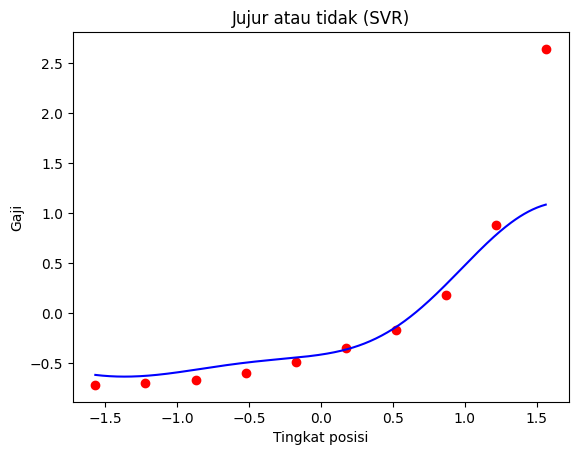

In [ ]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1) # Mengubah array X_grid ke bentuk kolom agar dapat digunakan oleh model prediksi.
plt.scatter(X, y, color='red') # Membuat scatter plot dari data asli, dengan titik-titik berwarna merah yang menunjukkan hubungan antara fitur X dan target y
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
# Menggambar garis prediksi model SVR berdasarkan X_grid dengan garis berwarna biru
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
# Memberi judul pada plot serta memberi label pada sumbu X dan Y.
plt.show()

Visualisasi ini menunjukkan data asli dalam bentuk scatter plot dan kurva prediksi SVR yang lebih halus dengan resolusi tinggi, yang memudahkan pengamatan bagaimana model SVR memprediksi target berdasarkan fitur. Garis biru menunjukkan prediksi SVR terhadap data dengan detail lebih tinggi.

6. Prediksi Hasil

*   Membuat array 2D yang berisi tingkat posisi yang akan diprediksi. Dalam contoh ini, tingkat posisi 6.5.

*   Menskalakan fitur prediksi menggunakan **sc_X.transform**.

*   Melakukan prediksi menggunakan model SVR yang telah dilatih.

*   Mengembalikan hasil prediksi ke dalam skala aslinya menggunakan **sc_y.inverse_transform.**

In [ ]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]]) # Membuat array 2D untuk tingkat posisi 6.5 yang akan diprediksi.
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

Kode ini memprediksi gaji untuk tingkat posisi tertentu (6.5) dengan menggunakan model SVR. Tingkat posisi diskalakan sebelum prediksi, dan hasil prediksi kemudian dikembalikan ke skala asli untuk mendapatkan nilai gaji dalam satuan yang dapat dipahami.

7. Menampilkan Hasil

Menampilkan hasil prediksi gaji untuk tingkat posisi 6.5 dalam kode

In [ ]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


8. Evaluasi Model SVR

In [ ]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Membalikkan penskalaan pada data target yang sudah diprediksi
y_actual = y
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


<hr>

# Tugas Praktikum:

<hr>

| NAMA | NIM | Absen |
| ----------| :-----------: | :---------:|
| Eddo Dava Alfarisi | 2241720232 |  7 |
| Fanesabhirawaning Sulistyo | 2141720027 |  10 |
| Lintang Aprillya Sari | 2241720231 | 13 |
| Wahyudi | 2141720018 |  26 |

# Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets

Instruksi Umum:
Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.
Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

Tugas 1: Multiple Linear Regression
1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
3. Lakukan feature scaling jika diperlukan.
4. Buat model multiple linear regression menggunakan Scikit-Learn.
5. Latih model pada data latih dan lakukan prediksi pada data uji.
6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

Catatan Tambahan:
Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.
Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.
Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

<hr><hr>

**Jawaban**




1. **Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).**

Dataset ini berisi informasi biaya medis pribadi pasien, termasuk variabel-variabel berikut:

- age: Usia pasien.
- sex: Jenis kelamin pasien (pria/wanita).
- bmi: Indeks massa tubuh (BMI) pasien.
- children: Jumlah anak/anak-anak dalam polis asuransi.
- smoker: Status perokok pasien (ya/tidak).
- region: Wilayah geografis pasien.
- charges: Biaya medis pribadi yang dikeluarkan oleh pasien.



**Import Library**

In [21]:
import pandas as pd # Untuk membaca, memanipulasi, dan mengelola dataset.
import numpy as np # Untuk komputasi numerik dan operasi array.

import matplotlib.pyplot as plt # Untuk membuat visualisasi data seperti grafik dan plot.
import seaborn as sns # Untuk membuat visualisasi statistik yang lebih menarik dan informatif.
from sklearn.compose import make_column_transformer
# Untuk menerapkan transformasi berbeda pada kolom dataset (contohnya, encoding untuk kategorikal, penskalaan untuk numerik).

from sklearn.preprocessing import OneHotEncoder, StandardScaler
# OneHotEncoder: Mengonversi variabel kategorikal ke bentuk numerik biner.
# StandardScaler: Menstandarkan fitur numerik ke skala yang sama.

from sklearn.model_selection import train_test_split # Membagi dataset menjadi data latih dan data uji untuk melatih dan menguji model.

from sklearn.linear_model import LinearRegression
# Melatih model regresi linier untuk memprediksi nilai target berdasarkan variabel fitur.

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Menghitung metrik evaluasi seperti MSE (Mean Squared Error), R-squared (R2), dan MAE (Mean Absolute Error).

from sklearn.pipeline import make_pipeline
# Menggabungkan langkah-langkah preprocessing dan pelatihan model ke dalam satu alur otomatis.

from sklearn.preprocessing import LabelEncoder

**1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).**

Kode ini digunakan untuk memuat dan menampilkan data asuransi dari sebuah file CSV

In [14]:
df = pd.read_csv('insurance.csv') #  membaca file CSV bernama 'insurance.csv' dan menyimpannya ke dalam variabel df (biasanya singkatan dari DataFrame).
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Pemahaman Terhadap Data**

In [15]:
# ukuran data
df.shape

(1338, 7)

138 mewakili jumlah baris dalam DataFrame.
7 mewakili jumlah kolom dalam DataFrame.

In [16]:
# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


*   Jumlah Baris dan Kolom:

DataFrame memiliki 1338 baris (entries) dan 7 kolom.


*   Informasi Kolom:

Nama setiap kolom ditampilkan beserta jumlah data non-null dan tipe datanya.
Misalnya, 'age' adalah integer (int64), 'bmi' adalah float (float64), dan 'sex' adalah object (biasanya string).


*   Tipe Data:

Ada 2 kolom bertipe float64, 2 kolom int64, dan 3 kolom object.


*   Nilai Null:

Semua kolom memiliki 1338 nilai non-null, yang berarti tidak ada nilai yang hilang dalam dataset.


*   Penggunaan Memori:

DataFrame menggunakan sekitar 73.3+ KB memori.

In [17]:
# deskripsi data
df.describe() # memberikan ringkasan statistik dari kolom-kolom numerik dalam DataFrame.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [18]:
df.isnull().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


output dari kode ini akan memberikan jumlah total nilai yang hilang di setiap kolom dalam dataset. Jika suatu kolom tidak memiliki nilai hilang, hasilnya akan 0 untuk kolom tersebut. Ini membantu untuk mengetahui apakah ada data yang tidak lengkap

In [22]:
# encoding kategorikal
le = LabelEncoder() # membuat instance dari kelas LabelEncoder dari scikit-learn.
df['sex'] = le.fit_transform(df['sex'])
# Mengubah nilai-nilai dalam kolom 'sex' (misalnya 'male', 'female') menjadi angka (0, 1).
df['smoker'] = le.fit_transform(df['smoker'])
# Mengubah nilai-nilai dalam kolom 'smoker' (misalnya 'yes', 'no') menjadi angka (0, 1).
df['region'] = le.fit_transform(df['region'])


Hasil akhirnya adalah dataset yang telah diubah, di mana semua kolom kategorikal ('sex', 'smoker', 'region') sekarang berisi nilai numerik.

**Visualisasi data**

Pairplot untuk menampilkan hubungan antara variabel bebas dan variabel target dalam bentuk scatter plot.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


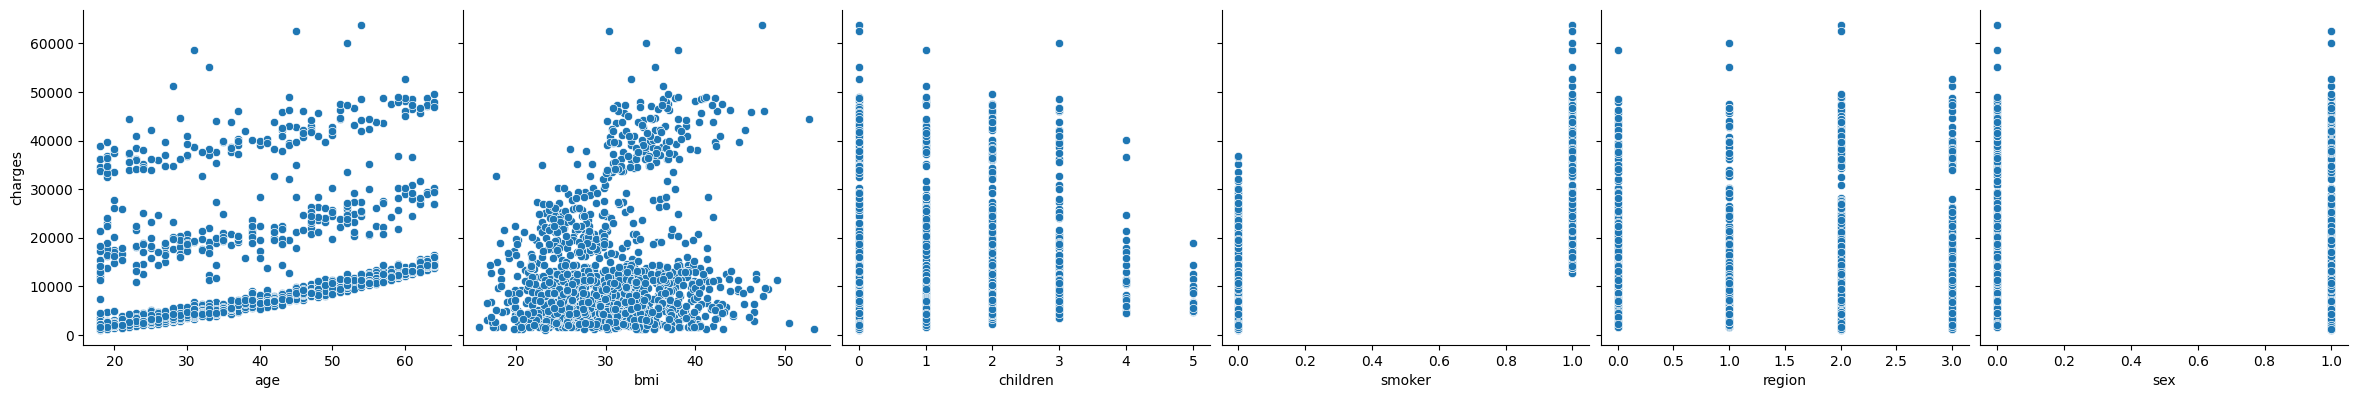

In [30]:
# operasi visualisasi
sns.pairplot(df, x_vars=['age', 'bmi','children', 'smoker', 'region', 'sex'],
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

Kode ini menghasilkan scatter plots untuk memvisualisasikan hubungan antara beberapa variabel independen (seperti usia, BMI, jumlah anak, status perokok, wilayah, jenis kelamin) dengan variabel target (charges, yaitu biaya medis).

<Axes: >

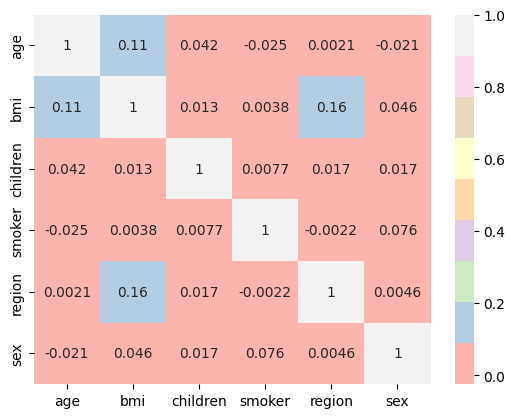

In [32]:
corr = df[['age', 'bmi','children', 'smoker', 'region', 'sex']].corr()
# Memilih kolom variabel yang akan dihitung korelasinya (age, bmi, children, smoker, region, sex).

sns.heatmap(corr, annot=True, cmap='Pastel1')
# Membuat visualisasi heatmap dari matriks korelasi.
# annot=True: Menampilkan nilai korelasi di setiap sel.
# cmap='pastel': Menggunakan skema warna pastel untuk heatmap.

Heatmap korelasi memberikan gambaran visual tentang bagaimana variabel-variabel dalam dataset berinteraksi satu sama lain, membantu kita memahami hubungan antar-variabel dengan lebih mudah dan efisien.

In [34]:
# Variabel target (biaya medis personal)
target_variable = df['charges']
# Mengambil kolom charges sebagai variabel target (biaya medis personal) untuk diprediksi.

# Variabel bebas (fitur) yang dipilih
independent_variables = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
# Memilih beberapa kolom sebagai variabel bebas (fitur) yang akan digunakan untuk memprediksi biaya medis.

# Menampilkan beberapa baris pertama dari data
print(df.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


Kode ini menyiapkan data untuk memprediksi biaya medis berdasarkan faktor usia, jenis kelamin, BMI, jumlah anak, status merokok, dan wilayah tempat tinggal.

**2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.**

In [ ]:
# Memisahkan fitur (X) dan target (y)
X = df[['age', 'bmi', 'children', 'smoker', 'region', 'sex']]
y = df['charges']

# X: Variabel-variabel yang digunakan sebagai fitur untuk memprediksi biaya medis (age, bmi, children, smoker, region, sex).
# y: Variabel target, yaitu biaya medis (charges), yang ingin diprediksi.

# Pembagian data latih dan data uji dengan proporsi 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
# Membagi dataset menjadi data latih (70%) dan data uji (30%) secara acak.

# Menampilkan ukuran dari data latih dan data uji
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))
# Menampilkan jumlah baris data latih dan data uji untuk memastikan pembagiannya benar.

Jumlah data latih: 936
Jumlah data uji: 402


Kode ini memisahkan dataset menjadi fitur dan target, kemudian membagi dataset tersebut menjadi data latih (70%) dan data uji (30%). Data latih digunakan untuk melatih model prediksi, sementara data uji digunakan untuk mengevaluasi performa model.

**3. Lakukan feature scaling jika diperlukan.**

**4. Buat model multiple linear regression menggunakan Scikit-Learn.**

In [ ]:
# Membuat transformer
preprocessor = make_column_transformer(
    (StandardScaler(), ['age', 'bmi', 'children']),  # Normalisasi variabel numerik
    (OneHotEncoder(), ['sex', 'smoker', 'region'])  # Encode variabel kategorikal
)

Kode ini membuat transformer yang akan menormalkan variabel numerik dan meng-encode variabel kategorikal. Proses ini penting untuk menyiapkan data sebelum dimasukkan ke model machine learning, sehingga semua fitur dapat diproses dengan benar.

In [ ]:
# Membuat model
model = LinearRegression()
# Membuat model regresi linier, yang akan digunakan untuk memprediksi biaya medis berdasarkan fitur-fitur yang telah disiapkan.

model_pipeline = make_pipeline(preprocessor, model) # Membuat pipeline yang terdiri dari dua tahap
# preprocessor: Melakukan preprocessing (normalisasi dan encoding) pada data.
# model: Model regresi linier yang digunakan untuk prediksi setelah data diproses.

Kode ini membuat pipeline model prediksi biaya medis menggunakan regresi linier. Pipeline tersebut akan otomatis melakukan preprocessing data sebelum melatih model, sehingga data siap untuk prediksi tanpa harus memprosesnya secara manual setiap kali.

**5. Latih model pada data latih dan lakukan prediksi pada data uji.**

In [ ]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linearregression', LinearRegression())])

*  fit(): Melatih pipeline model menggunakan data latih (X_train dan y_train).
*   X_train: Fitur yang telah dipisahkan untuk melatih model.
*  y_train: Target (biaya medis) yang sesuai dengan fitur tersebut.
Pada langkah ini, pipeline melakukan preprocessing data (normalisasi dan encoding) terlebih dahulu, lalu melatih model regresi linier dengan data yang telah diproses.

Kode ini melatih pipeline model regresi linier dengan data latih. Data fitur diproses secara otomatis (scaling dan encoding) sebelum model dilatih untuk memprediksi biaya medis personal berdasarkan fitur-fitur yang tersedia.

In [ ]:
# Melakukan prediksi
y_pred = model_pipeline.predict(X_test)

Kode ini menggunakan model yang telah dilatih untuk memprediksi biaya medis berdasarkan data uji. Hasil prediksi ini nantinya dapat dibandingkan dengan nilai aktual untuk mengevaluasi performa model.

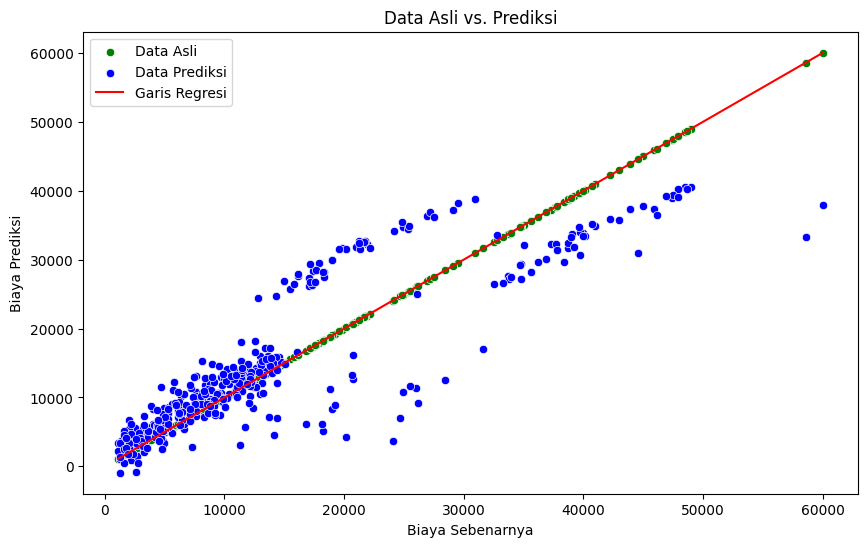

In [ ]:
# Plot Data Asli dan Prediksi dengan warna yang berbeda
plt.figure(figsize=(10, 6))
# Membuat figure untuk plot dengan ukuran 10x6.

# Scatter plot data asli (biru)
sns.scatterplot(x=y_test, y=y_test, color='green', label='Data Asli')
# Plot titik-titik dari data asli (y_test) dalam warna hijau. Ini menunjukkan biaya medis sebenarnya dari data uji.

# Scatter plot data prediksi (merah)
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Data Prediksi')
# Plot titik-titik dari prediksi model (y_pred) dalam warna biru. Ini menunjukkan biaya medis yang diprediksi oleh model.

# Garis regresi
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Garis Regresi')
# Menambahkan garis merah lurus dari nilai minimum ke maksimum dari data uji. Garis ini menunjukkan "prediksi sempurna" (di mana nilai prediksi sama dengan nilai asli).

plt.xlabel("Biaya Sebenarnya")
plt.ylabel("Biaya Prediksi")
plt.title("Data Asli vs. Prediksi")
plt.legend()
plt.show()

Kode ini membuat plot perbandingan antara biaya medis asli dan biaya yang diprediksi oleh model. Plot ini membantu memvisualisasikan seberapa akurat prediksi model dengan membandingkan titik-titik data asli dan prediksi. Garis regresi merah menunjukkan prediksi yang ideal, di mana semua prediksi akan tepat di garis tersebut jika model sempurna.

**6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.**

In [ ]:
# Menghitung metrik
r2 = r2_score(y_test, y_pred)
# Menghitung R-squared (koefisien determinasi), yang menunjukkan seberapa baik model dapat menjelaskan variasi dalam data asli.
# Nilai R² berkisar dari 0 hingga 1, dengan nilai mendekati 1 menunjukkan model yang baik.

mse = mean_squared_error(y_test, y_pred)
# Menghitung MSE, yaitu rata-rata dari selisih kuadrat antara nilai asli dan nilai prediksi.
# Semakin kecil nilai MSE, semakin baik modelnya.

mae = mean_absolute_error(y_test, y_pred)
#Menghitung MAE, yaitu rata-rata dari selisih absolut antara nilai asli dan prediksi.
#MAE memberikan gambaran seberapa jauh prediksi dari nilai asli secara rata-rata.

# Menampilkan hasil evaluasi
print(f'R-squared: {r2:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
# Menampilkan nilai R-squared, MSE, dan MAE dengan format dua angka desimal.

R-squared: 0.78
MSE: 32345536.75
MAE: 3943.24


Kode ini menghitung metrik evaluasi untuk menilai kinerja model prediksi. Metrik R-squared menunjukkan seberapa baik model menjelaskan data, sementara MSE dan MAE menunjukkan seberapa besar kesalahan prediksi rata-rata model. Nilai-nilai ini membantu memahami akurasi dan performa model secara keseluruhan.